# Reading and plotting with xarray

## Synopsis

- Use xarray to read and plot spherical data in only a few lines

## xarray

We now turn to the package __xarray__ whose documentation you can find at http://xarray.pydata.org/en/stable/index.html.

Install with
```bash
conda install -c conda-forge xarray
```
although you should check their documentation for other dependencies such as cartopy (we've used the critical ones in earlier notebooks so if you've been following along you should be alright).

Here's the usual import cell:

In [1]:
import xarray
import cartopy.crs
import matplotlib.pyplot as plt

In terms of what we've already covered, xarray plays the role of the netCDF4 and matplotlib.pyplot packages combined. It allows use to open a dataset and plot it with minimal intermediate steps.

First, we'll open the same dataset that we earlier accessed using `netCDF4.Dataset()` but this time with `xarray.open_dataset()`:

In [2]:
ds = xarray.open_dataset('http://esgf-data2.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/CMIP/MIROC/MIROC6/1pctCO2/r1i1p1f1/Omon/tos/gn/v20181212/tos_Omon_MIROC6_1pctCO2_r1i1p1f1_gn_330001-334912.nc')

C:\Users\ajadc\Miniconda3\envs\py3\lib\site-packages\xarray\coding\times.py:122: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
C:\Users\ajadc\Miniconda3\envs\py3\lib\site-packages\xarray\coding\variables.py:69: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array)


If you see pink-background warnings, don't worry - that's a result of the choice of dataset. The dataset was opened and we can query it by looking at the variable, `ds`, we created:

In [3]:
print(ds)

<xarray.Dataset>
Dimensions:             (bnds: 2, time: 600, vertices: 4, x: 360, y: 256)
Coordinates:
  * time                (time) object 3300-01-16 12:00:00 ... 3349-12-16 12:00:00
  * y                   (y) float64 -88.0 -85.75 -85.25 ... 148.6 150.5 152.4
  * x                   (x) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    latitude            (y, x) float32 ...
    longitude           (y, x) float32 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object ...
    y_bnds              (y, bnds) float64 ...
    x_bnds              (x, bnds) float64 ...
    vertices_latitude   (y, x, vertices) float32 ...
    vertices_longitude  (y, x, vertices) float32 ...
    tos                 (time, y, x) float32 ...
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.6.1|hdf5lib...
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:      

This is the same information we saw when we printed the netCDF4.Dataset object except that this time it is much easier to read and at the same time is more concise!

The coordinates section is of particular interest. Dimension variables (defined in [Basics of accessing data](2-Basics-of-accessing-data.ipynb)) are indicated with an asterisk ("*") but there are some 2D variables in the coordinate section too.

We still have to use cartopy as before to hand he spherical coordinates but to make a plot we need only two statements:
1. Specify the projection (otherwise how would python know how you want to look at the data?)
2. Specify the data to plot (`ds.tos[0]`)

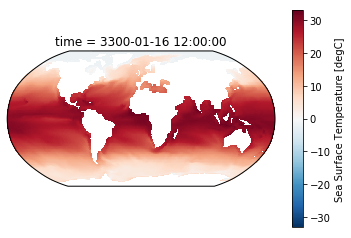

In [4]:
ax = plt.axes(projection=cartopy.crs.Robinson());
ds.tos[0].plot(transform=cartopy.crs.PlateCarree(), x='longitude', y='latitude');

Notice how the time of the dataset was kindly added to the plot? This is an example of the convenience of a high-level package relative to the lower-level operations we've been using via netCDF4 and matplotlib.pyplot. xarray is designed for intuitive analysis of N-dimensional data.

To be complete, if you a willing to skip the projection and plot using the projection coordinates, viewing the data with fully labelled axes and colorbar is as easy as:

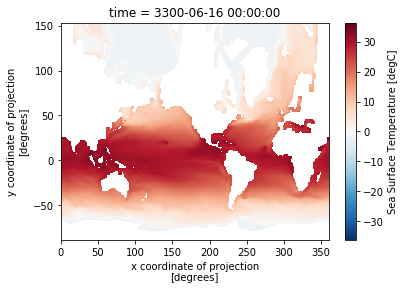

In [5]:
ds.tos[5].plot();

## Summary

- xarray is a high-level layer that sits on top of netCDF4 (or other APIs) and matplotlib.
- used `.plot()` with cartopy to plot in just two lines.